# Interpretability 10: Hessian

To understand the loss lanscape, we compute the hessian (loss wrt model parameters) and get its eigenvalues

Try both KAN and MLP, you will usually see that KANs have more non-zero eigenvalues than MLPs, meaning that KANs have more effective number of parameters than MLP. 

In [1]:
from kan.utils import get_derivative
import torch
from kan.MLP import MLP
from kan.MultKAN import KAN
from kan.utils import create_dataset, model2param
import copy

f = lambda x: x[:,[0]]**2
dataset = create_dataset(f, n_var=1, train_num=1000)

inputs = dataset['train_input']
labels = dataset['train_label']

#model = MLP(width = [1,30,1])
model = KAN(width=[1,5,1])
model.fit(dataset, opt='Adam', lr=1e-2, lamb=0.000, steps=1000);

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.69e-04 | test_loss: 3.66e-04 | reg: 1.05e+01 | : 100%|█| 1000/1000 [00:32<00:00, 30.

saving model version 0.1


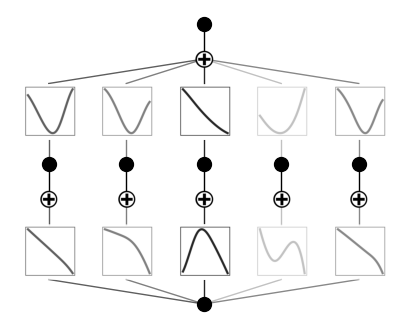

In [2]:
model.plot()

In [3]:
hess = get_derivative(model, inputs, labels, derivative='hessian')
values, vectors = torch.linalg.eigh(hess)

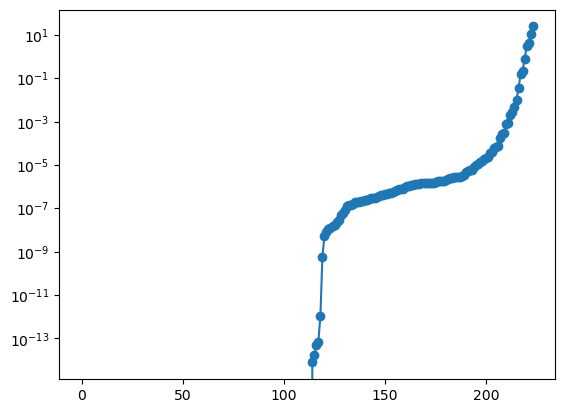

In [4]:
import matplotlib.pyplot as plt
plt.plot(values.numpy()[0], marker='o');
plt.yscale('log')